Management wants to find out which employee will likely resign from the company within the next six months. This is predictive analytics.

Predictive analytics tells what is likely to happen. It uses the findings of descriptive and diagnostic analytics to detect clusters and exceptions, and to predict future trends, which makes it a valuable tool for forecasting.

In [110]:
#Keith Chan Xin Kok
#S10193413E
#International Trade and Business
#TI03

#import the excel sheet data and store it into a pandas DataFrames called 'data' 
import pandas as pd
data = pd.read_excel('HR-Employee-Attrition(1).xlsx')

In [111]:
#perform descriptive analytics
data.describe(include ='all') #by default, only numerical columns will be shown. the 'include' parameter can be added to display all

,EmployeeNumber,Age,Attrition,BusinessTravel,DistanceFromHome,EducationField,Gender,MaritalStatus,MonthlyIncome,JobSatisfaction
count,1470.000000,1470.000000,1470,1470,1470.000000,1470,1470,1470,1470.000000,1354.000000
unique,NaN,NaN,2,3,NaN,6,2,4,NaN,NaN
top,NaN,NaN,No,Travel_Rarely,NaN,Life Sciences,Male,Married,NaN,NaN
freq,NaN,NaN,1233,1043,NaN,606,882,666,NaN,NaN
mean,735.500000,36.991837,NaN,NaN,9.192517,NaN,NaN,NaN,6502.931293,2.717134
std,424.496761,9.586548,NaN,NaN,8.106864,NaN,NaN,NaN,4707.956783,1.098498
min,1.000000,18.000000,NaN,NaN,1.000000,NaN,NaN,NaN,1009.000000,1.000000
25%,368.250000,30.000000,NaN,NaN,2.000000,NaN,NaN,NaN,2911.000000,2.000000
50%,735.500000,36.000000,NaN,NaN,7.000000,NaN,NaN,NaN,4919.000000,3.000000
75%,1102.750000,43.000000,NaN,NaN,14.000000,NaN,NaN,NaN,8379.000000,4.000000


In [112]:
#begin diagnostic analytics
#display first 5 rows of data to understand it and check for errors in datatype
print(data.head())
#display the number of rows and columns in the dataset
print(data.shape)
#display the names of the columns in the dataset
print(data.columns)
#display the data types of each column
print(data.dtypes)

   EmployeeNumber  Age Attrition  ... MaritalStatus  MonthlyIncome JobSatisfaction
0               1   41       Yes  ...        Single           5993             4.0
1               2   49        No  ...       Married           5130             2.0
2               3   37       Yes  ...        Single           2090             3.0
3               4   33        No  ...       Married           2909             3.0
4               5   27        No  ...       Married           3468             2.0

[5 rows x 10 columns]
(1470, 10)
Index(['EmployeeNumber', 'Age', 'Attrition', 'BusinessTravel',
       'DistanceFromHome', 'EducationField', 'Gender', 'MaritalStatus',
       'MonthlyIncome', 'JobSatisfaction'],
      dtype='object')
EmployeeNumber        int64
Age                   int64
Attrition            object
BusinessTravel       object
DistanceFromHome      int64
EducationField       object
Gender               object
MaritalStatus        object
MonthlyIncome         int64
JobSatisfaction

In [113]:
#extracting categorical fields to identify data quality issues 
data_cat = data.select_dtypes(include='object')
data_cat.head()

,Attrition,BusinessTravel,EducationField,Gender,MaritalStatus
0,Yes,Travel_Rarely,Life Sciences,Female,Single
1,No,Travel_Frequently,Life Sciences,Male,Married
2,Yes,Travel_Rarely,Other,Male,Single
3,No,Travel_Frequently,Life Sciences,Female,Married
4,No,Travel_Rarely,Medical,Male,Married


In [114]:
#extract categorical columns and use the value_counts() function to calculate the frequency of counts for each category
print(data_cat['Attrition'].value_counts())
print("\nThere are a total of " + str(data_cat['Attrition'].value_counts().count()) + " unique categories")

print("\n")
print(data_cat['BusinessTravel'].value_counts())
print("\nThere are a total of " + str(data_cat['BusinessTravel'].value_counts().count()) + " unique categories")

print("\n")
print(data_cat['EducationField'].value_counts())
print("\nThere are a total of " + str(data_cat['EducationField'].value_counts().count()) + " unique categories")

print("\n")
print(data_cat['Gender'].value_counts())
print("\nThere are a total of " + str(data_cat['Gender'].value_counts().count()) + " unique categories")

print("\n")
print(data_cat['MaritalStatus'].value_counts())
print("\nThere are a total of " + str(data_cat['MaritalStatus'].value_counts().count()) + " unique categories")

No     1233
Yes     237
Name: Attrition, dtype: int64

There are a total of 2 unique categories


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

There are a total of 3 unique categories


Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

There are a total of 6 unique categories


Male      882
Female    588
Name: Gender, dtype: int64

There are a total of 2 unique categories


Married         666
Single          470
Divorced        326
NOT_CAPTURED      8
Name: MaritalStatus, dtype: int64

There are a total of 4 unique categories


In [115]:
#using a non-visual plot to count the frequency of missing values for categorical columns
print("Missing values count for each column")
print(data_cat.isnull().sum())
missing_prop = data_cat.isnull().sum()/len(data_cat)
print("\nMissing values proportion for each column")
print(missing_prop)

Missing values count for each column
Attrition         0
BusinessTravel    0
EducationField    0
Gender            0
MaritalStatus     0
dtype: int64

Missing values proportion for each column
Attrition         0.0
BusinessTravel    0.0
EducationField    0.0
Gender            0.0
MaritalStatus     0.0
dtype: float64


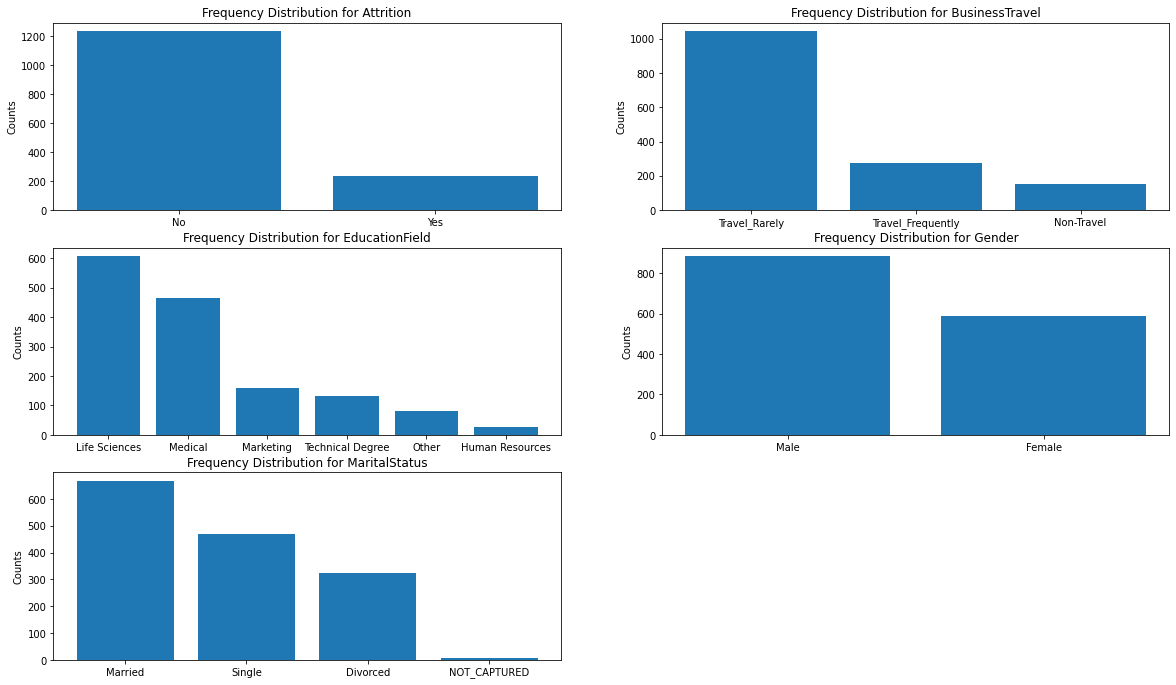

In [116]:
#as some columns have many values, frequency distribution bar plots can be used to visualise instead

import matplotlib.pyplot as plt
plt.figure(figsize = (20,20))

plt.subplot(5,2,1)
plt.title("Frequency Distribution for Attrition")
plt.ylabel('Counts')
plt.bar(data_cat['Attrition'].value_counts().index, data_cat['Attrition'].value_counts().values)

plt.subplot(5,2,2)
plt.title('Frequency Distribution for BusinessTravel')
plt.ylabel('Counts')
plt.bar(data_cat['BusinessTravel'].value_counts().index, data_cat['BusinessTravel'].value_counts().values)

plt.subplot(5,2,3)
plt.title('Frequency Distribution for EducationField')
plt.ylabel('Counts')
plt.bar(data_cat['EducationField'].value_counts().index, data_cat['EducationField'].value_counts().values)

plt.subplot(5,2,4)
plt.title('Frequency Distribution for Gender')
plt.ylabel('Counts')
plt.bar(data_cat['Gender'].value_counts().index, data_cat['Gender'].value_counts().values)

plt.subplot(5,2,5)
plt.title('Frequency Distribution for MaritalStatus')
plt.ylabel('Counts')
plt.bar(data_cat['MaritalStatus'].value_counts().index, data_cat['MaritalStatus'].value_counts().values)

plt.show()

In [117]:
#checking if the formula is correct
data['MaritalStatus']!= 'NOT_CAPTURED'

0       True
1       True
2       True
3       True
4       True
        ... 
1465    True
1466    True
1467    True
1468    True
1469    True
Name: MaritalStatus, Length: 1470, dtype: bool

In [118]:
#removing all rows with the 'NOT_CAPTURED' category in the 'MaritalStatus' column
data = data.loc[data['MaritalStatus']!= 'NOT_CAPTURED']

In [119]:
#verifying that there are no longer any counts of 'NOT_CAPTURED' in the column
data['MaritalStatus'].value_counts()

Married     666
Single      470
Divorced    326
Name: MaritalStatus, dtype: int64

In [120]:
#extracting numerical fields to identify data quality issues 
data_num = data.select_dtypes(include = ['int', 'float'])
data_num.head()

,EmployeeNumber,Age,DistanceFromHome,MonthlyIncome,JobSatisfaction
0,1,41,1,5993,4.0
1,2,49,8,5130,2.0
2,3,37,2,2090,3.0
3,4,33,3,2909,3.0
4,5,27,2,3468,2.0


In [121]:
#using a frequency count to count the frequency of missing values of numerical columns
print("Missing values count for each column")
print(data_num.isnull().sum())
missing_prop = data_num.isnull().sum()/len(data_num)
print("\nMissing values proportion for each column")
print(missing_prop)

Missing values count for each column
EmployeeNumber        0
Age                   0
DistanceFromHome      0
MonthlyIncome         0
JobSatisfaction     116
dtype: int64

Missing values proportion for each column
EmployeeNumber      0.000000
Age                 0.000000
DistanceFromHome    0.000000
MonthlyIncome       0.000000
JobSatisfaction     0.079343
dtype: float64


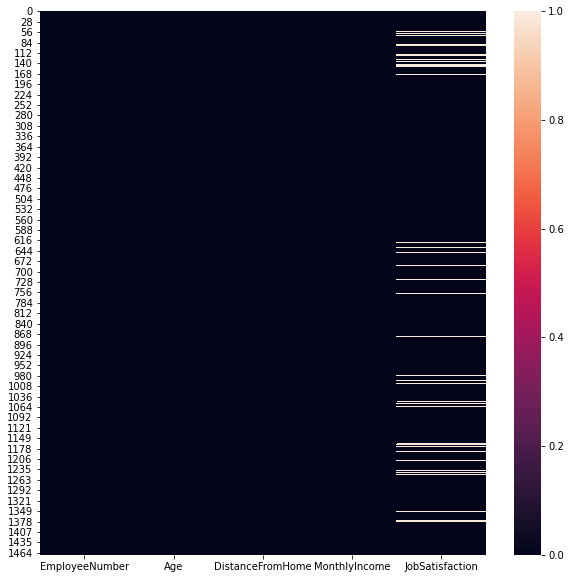

In [122]:
#using a visual plot to create a heat map for missing numerical values
import seaborn as sns
plt.figure(figsize = [10,10])
sns.heatmap(data_num.isnull())

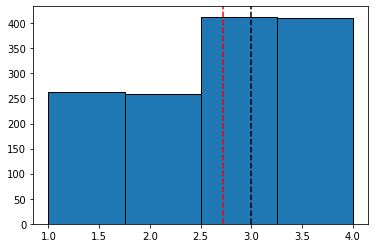

In [123]:
#as the JobSatisfaction column has more than 5% but lower than 20% of missing values, the missing values must be imputed
plt.hist(data['JobSatisfaction'], bins = 4, edgecolor = 'black')
plt.axvline(x = data['JobSatisfaction'].mean(), linestyle = 'dashed', color = 'red')
plt.axvline(x = data['JobSatisfaction'].median(), linestyle = 'dashed', color = 'black')
plt.show()

In [124]:
#from the histogram, 'JobSatisfaction' is not normally distributed and has many frequency counts of customers with scores of 2.5 and below. Hence, the mean will be pulled towards the left in the distribution, and median would be a better choice.
data_im = data.copy()
data_im['JobSatisfaction'].fillna(value=data['JobSatisfaction'].median(), axis = 0, inplace = True)
data.loc[data['JobSatisfaction'].isnull(),:]

,EmployeeNumber,Age,Attrition,BusinessTravel,DistanceFromHome,EducationField,Gender,MaritalStatus,MonthlyIncome,JobSatisfaction
55,56,33,No,Travel_Frequently,1,Life Sciences,Female,Single,13458,NaN
56,57,35,No,Travel_Frequently,18,Life Sciences,Male,Married,9069,NaN
61,62,38,No,Travel_Frequently,29,Life Sciences,Female,Single,2406,NaN
66,67,36,No,Travel_Frequently,11,Life Sciences,Male,Single,6499,NaN
68,69,35,No,Travel_Frequently,1,Medical,Male,Married,2194,NaN
...,...,...,...,...,...,...,...,...,...,...
1375,1376,32,Yes,Travel_Frequently,5,Life Sciences,Female,Single,2432,NaN
1377,1378,49,No,Travel_Frequently,2,Life Sciences,Male,Married,19161,NaN
1379,1380,27,Yes,Travel_Frequently,22,Human Resources,Female,Married,2863,NaN
1389,1390,31,No,Travel_Frequently,1,Life Sciences,Male,Married,5003,NaN


In [125]:
#verifying the imputation by checking to see if the missing values have been replaced with the median
data_im.loc[[55,56,61,66,68]]

,EmployeeNumber,Age,Attrition,BusinessTravel,DistanceFromHome,EducationField,Gender,MaritalStatus,MonthlyIncome,JobSatisfaction
55,56,33,No,Travel_Frequently,1,Life Sciences,Female,Single,13458,3.0
56,57,35,No,Travel_Frequently,18,Life Sciences,Male,Married,9069,3.0
61,62,38,No,Travel_Frequently,29,Life Sciences,Female,Single,2406,3.0
66,67,36,No,Travel_Frequently,11,Life Sciences,Male,Single,6499,3.0
68,69,35,No,Travel_Frequently,1,Medical,Male,Married,2194,3.0


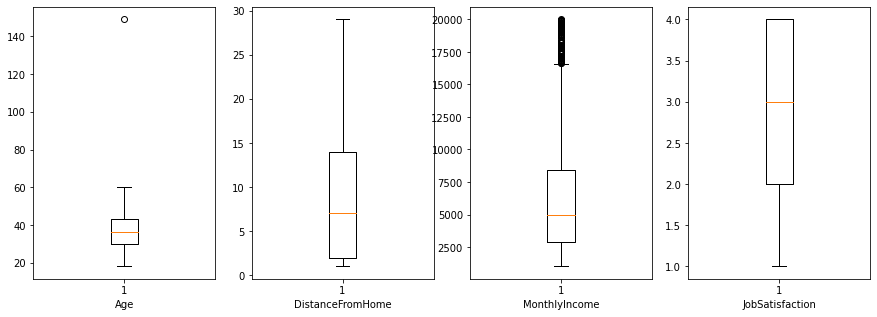

In [126]:
#using a boxplot to find numerical outliers
plt.figure(figsize = [15,5])

plt.subplot(1,4,1)
plt.xlabel('Age')
plt.boxplot(data_num['Age'].dropna())

plt.subplot(1,4,2)
plt.xlabel('DistanceFromHome')
plt.boxplot(data_num['DistanceFromHome'].dropna())

plt.subplot(1,4,3)
plt.xlabel('MonthlyIncome')
plt.boxplot(data_num['MonthlyIncome'].dropna())

plt.subplot(1,4,4)
plt.xlabel('JobSatisfaction')
plt.boxplot(data_num['JobSatisfaction'].dropna())

plt.show()

In [127]:
#computing the upper and lower fence values to remove the outlier
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
MEDIAN = data['Age'].median()
IQR = Q3 - Q1
UpperFence = Q3 + 1.5*IQR
LowerFence = Q1 - 1.5*IQR
print("Q1={},Q3={}, MEDIAN={}, IQR={}, UpperFence={}, LowerFence={}".format(Q1,Q3,MEDIAN,IQR,UpperFence,LowerFence))

Q1=30.0,Q3=43.0, MEDIAN=36.0, IQR=13.0, UpperFence=62.5, LowerFence=10.5


In [128]:
#as an age above 140 is not realistic, the outlier in age should be removed.
data_im_ro = data_im.copy()
(data_im_ro['Age']>=LowerFence) & (data_im_ro['Age']<=UpperFence)

0       True
1       True
2       True
3       True
4       True
        ... 
1465    True
1466    True
1467    True
1468    True
1469    True
Name: Age, Length: 1462, dtype: bool

In [129]:
#there are also outliers in the MonthlyIncome column, but a monthly salary of 20,000 is possible for high ranking employees such as CEO, CTO, CFO etc. Hence, the outliers should be kept as it may also be useful information for the model to learn from.
data_im_ro = data_im_ro.loc[(data_im_ro['Age']>=LowerFence) & (data_im_ro['Age']<=UpperFence),:]

In [130]:
#using the duplicated function to create a non-visual plot to find numerical duplicates
data_num.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1462, dtype: bool

In [131]:
#counting the number of numerical duplicates
data_num.duplicated().sum()

0